* Load Dataset

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('customer_purchase_behavior_dataset_dirty.csv')

* Data Cleaning

In [3]:
# 1.Fix Text Format
df.head(10)

,Customer Id,Annual Income,Annual Spend,Monthly Visits,Avg Order Value,Customer Tenure Years,Gender,Payment Method
0,C00001,57038.20012,2024.833926,8,209.202750,8,Female,Store
1,C00002,33375.25250,587.262333,4,136.242236,6,male,Mobile App
2,C00003,200922.89270,9718.062708,19,468.912192,8,Female,Store
3,C00004,56825.77387,2370.381489,5,434.361536,9,Female,Store
4,C00005,NaN,554.369221,1,550.554463,7,Male,Mobile App
5,C00006,28819.57902,700.967535,1,478.411736,7,Female,Online
6,C00007,NaN,2069.413454,9,203.495170,6,Female,Store
7,C00008,178456.85280,12438.738260,17,620.646103,8,Male,Store
8,C00009,49131.53632,1957.374937,6,311.942104,3,Female,Store
9,C00010,33438.51235,487.037817,4,129.432113,5,male,Store


In [4]:
df.columns

Index(['Customer Id', 'Annual Income', 'Annual Spend', 'Monthly Visits',
       'Avg Order Value', 'Customer Tenure Years', 'Gender  ',
       'Payment Method  '],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip().str.title().str.replace(' ','_')
df.columns

Index(['Customer_Id', 'Annual_Income', 'Annual_Spend', 'Monthly_Visits',
       'Avg_Order_Value', 'Customer_Tenure_Years', 'Gender', 'Payment_Method'],
      dtype='object')

In [6]:
df['Gender'].unique()

array(['Female', 'male', 'Male', 'M', 'F'], dtype=object)

In [7]:
df['Gender'] = df['Gender'].str.strip().replace({'male':'Male','M':'Male','F':'Female'})
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df['Payment_Method'].unique()

array(['Store', 'Mobile App', 'Online', 'STORE', 'online'], dtype=object)

In [9]:
df['Payment_Method'] = df['Payment_Method'].str.strip().replace({'STORE':'Store','online':'Online'})
df['Payment_Method'].unique()

array(['Store', 'Mobile App', 'Online'], dtype=object)

In [10]:
# 2.Handling Missing Values
df.isnull().sum()

Customer_Id                0
Annual_Income            307
Annual_Spend             304
Monthly_Visits             0
Avg_Order_Value          307
Customer_Tenure_Years      0
Gender                     0
Payment_Method             0
dtype: int64

In [11]:
for col in ['Annual_Income','Annual_Spend','Avg_Order_Value']:
    df[col].fillna(df[col].median(),inplace=True)
df.isnull().sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_3144\3367571995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_3144\3367571995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

Customer_Id              0
Annual_Income            0
Annual_Spend             0
Monthly_Visits           0
Avg_Order_Value          0
Customer_Tenure_Years    0
Gender                   0
Payment_Method           0
dtype: int64

In [12]:
# 3.Remove Duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
# 4.Fix Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            10200 non-null  object 
 1   Annual_Income          10200 non-null  float64
 2   Annual_Spend           10200 non-null  float64
 3   Monthly_Visits         10200 non-null  int64  
 4   Avg_Order_Value        10200 non-null  float64
 5   Customer_Tenure_Years  10200 non-null  int64  
 6   Gender                 10200 non-null  object 
 7   Payment_Method         10200 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 637.6+ KB


In [14]:
# 5.Outliers
df.describe()

,Annual_Income,Annual_Spend,Monthly_Visits,Avg_Order_Value,Customer_Tenure_Years
count,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000
mean,69818.775357,3474.066676,7.582843,354.587876,5.506667
std,43588.228347,3862.150962,5.007280,183.459122,2.878688
min,18331.437580,314.096657,1.000000,-9.896756,1.000000
25%,33909.125723,696.248108,4.000000,217.035550,3.000000
50%,56135.511660,1847.954656,7.000000,301.522467,6.000000
75%,88868.530450,4432.190513,9.000000,469.637752,8.000000
max,220071.850200,18114.925150,22.000000,1040.296243,10.000000


In [15]:
num = ['Annual_Income','Annual_Spend','Avg_Order_Value']
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.5
    df[col] = np.clip(df[col],lower,upper)
df.describe()

,Annual_Income,Annual_Spend,Monthly_Visits,Avg_Order_Value,Customer_Tenure_Years
count,10200.000000,10200.000000,10200.000000,10200.000000,10200.000000
mean,69327.646832,3167.337455,7.582843,354.120700,5.506667
std,42316.236355,3126.187813,5.007280,182.099342,2.878688
min,18331.437580,314.096657,1.000000,-9.896756,1.000000
25%,33909.125723,696.248108,4.000000,217.035550,3.000000
50%,56135.511660,1847.954656,7.000000,301.522467,6.000000
75%,88868.530450,4432.190513,9.000000,469.637752,8.000000
max,171307.637541,10036.104121,22.000000,848.541054,10.000000


In [16]:
# 6.Save
df.to_csv('customer_purchase_behavior_cleaned.csv',index=False)

* EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('customer_purchase_behavior_cleaned.csv')

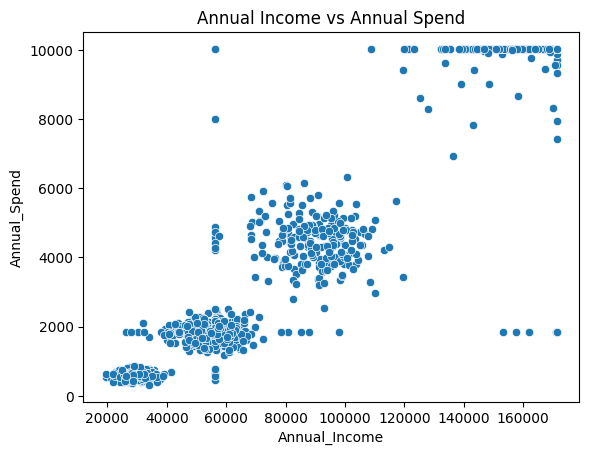

In [18]:
# 1.Relation between Annual Income vs Annual Spend
sns.scatterplot(x=df['Annual_Income'].head(1000),y=df['Annual_Spend'].head(1000))
plt.title('Annual Income vs Annual Spend')
plt.xlabel('Annual_Income')
plt.ylabel('Annual_Spend')
plt.show()

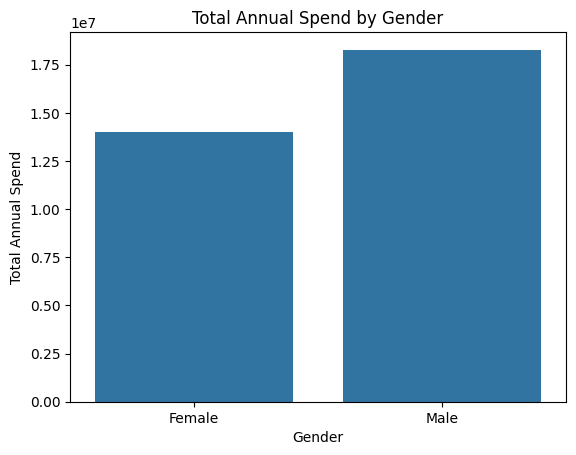

In [19]:
# 2.What is the total Annual Spend by Gender?
total = df.groupby('Gender')['Annual_Spend'].sum()
sns.barplot(x=total.index,y=total.values)
plt.title('Total Annual Spend by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Annual Spend')
plt.show()

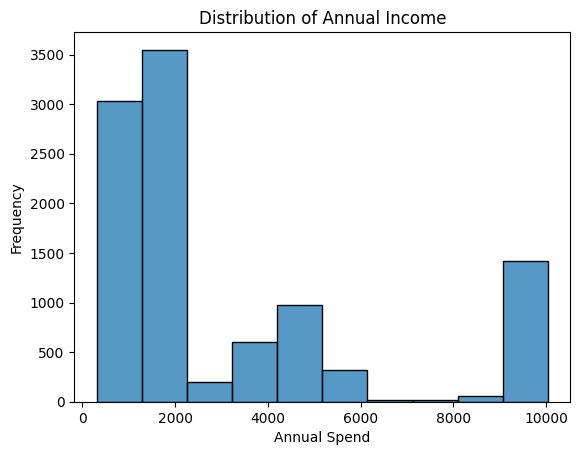

In [20]:
# 3.What is the distribution of Annual Spend?
sns.histplot(df['Annual_Spend'],bins=10)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Spend')
plt.ylabel('Frequency')
plt.show()

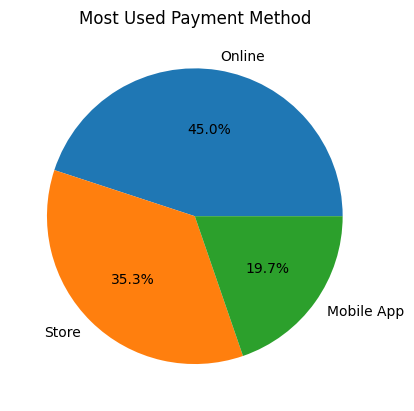

In [21]:
# 4.Which payment method is used most frequently?
Payment_Method = df['Payment_Method'].value_counts()
plt.pie(Payment_Method.values,labels=Payment_Method.index,autopct='%1.1f%%')
plt.title('Most Used Payment Method')
plt.show()

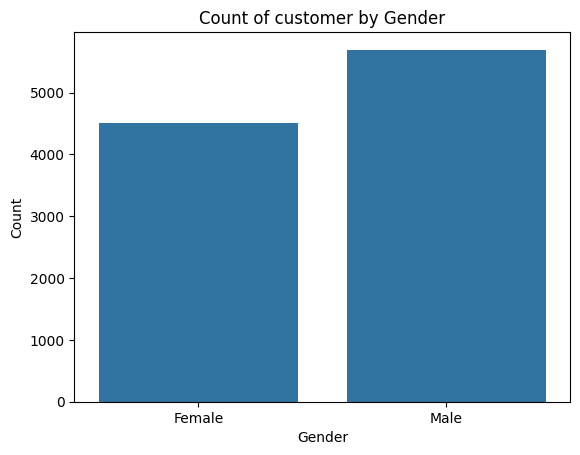

In [22]:
# 5.Count of customer by Gender
sns.countplot(x=df['Gender'])
plt.title('Count of customer by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

* Data Preprocessing

In [23]:
from sklearn.preprocessing import StandardScaler

feature = ['Annual_Income','Annual_Spend','Monthly_Visits','Avg_Order_Value']
x = df[feature]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

* Train Model

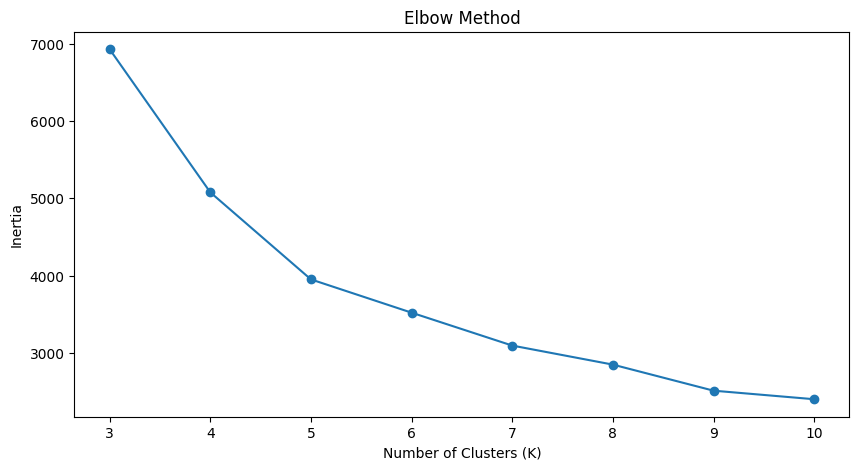

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding Best K Using Elbow Method
inertia = []
k_range = range(3,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker="o")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.xticks(k_range)
plt.show()

In [25]:
# Train Final KMeans Model
final_kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)
label = final_kmeans.fit_predict(x_scaled)
df['cluster'] = label

# Silhouette Score
print(silhouette_score(x_scaled, label))

0.4965634244624708


* Assign Class Names to Predicted Clusters

In [26]:
# Get cluster centers
centers = pd.DataFrame(scaler.inverse_transform(final_kmeans.cluster_centers_),columns=feature)
centers['cluster'] = centers.index
print(centers.sort_values('Annual_Spend'))

   Annual_Income  Annual_Spend  Monthly_Visits  Avg_Order_Value  cluster
3   30824.149586    639.067164        2.548260       239.581180        3
1   55139.413014   1809.082696        6.567905       264.659844        1
2   89081.081664   4430.955296        9.500493       458.566728        2
0  154006.622768   9787.753194       17.546174       657.311138        0


In [27]:
# Create Class Names
df['predicted_segment_name'] = df['cluster'].replace(
    {3:'Budget Shoppers', 
     1:'Regular Customers', 
     2:'Premium Customers', 
     0:'Loyal Customers'})

# Save
df.to_csv('predicted_segment_name.csv',index=False)